In [1]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import shutil
import os

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

In [10]:
# capture = cv.VideoCapture('/Users/aadipatangi/Desktop/Python Projects/ConeDetection/IMG_1200.MOV')

In [11]:
# frameNr = 0
 
# while (True):
 
#     success, frame = capture.read()
 
#     if success:
#         frame = cv.rotate(frame,cv.ROTATE_180)

#         cv.imwrite(f'/Users/aadipatangi/Desktop/Python Projects/ConeDetection/redconephotos/frame_{frameNr}.jpg', frame)
 
#     else:
#         break
 
#     frameNr = frameNr+1
 
# capture.release()

(3840, 2160, 3)


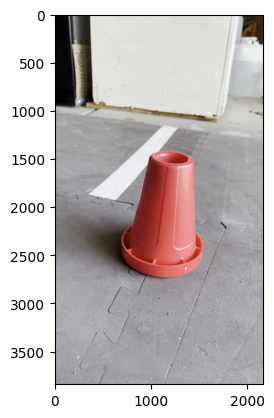

In [2]:
image = plt.imread('/Users/aadipatangi/Desktop/Python Projects/ConeDetection/test/red/frame_999.jpg')
plt.imshow(image)
print(image.shape)

In [17]:
# i = 755
# while i < 1078:
#   shutil.move("/Users/aadipatangi/Desktop/Python Projects/ConeDetection/redconephotos/frame_"+str(i)+".jpg","/Users/aadipatangi/Desktop/Python Projects/ConeDetection/redtest/frame_"+str(i)+".jpg")
#   i = i + 1

In [3]:
LABELS = ['red','blue']


IMG_HEIGHT = 270
IMG_WIDTH  = 480

def get_data(data_dir):
    data = []
    clas = []
    for label in LABELS: 
        path = os.path.join(data_dir, label)
      
        class_num = LABELS.index(label)

        for img in os.listdir(path):
            try:
                img_arr = cv.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv.resize(img_arr, (IMG_HEIGHT, IMG_WIDTH)) # Reshaping images to preferred size
                data.append(resized_arr)
                clas.append(class_num)
            except Exception as e:
                print(e)
                
    #return np.array(data,dtype = "object")
    return data,clas

In [4]:
img_train,clas_train = get_data('/Users/aadipatangi/Desktop/Python Projects/ConeDetection/train')

'NoneType' object is not subscriptable


1465
(480, 270, 3)


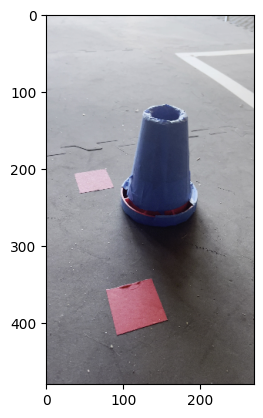

In [5]:
print(len(img_train))
data = np.asarray(img_train[1400])
print(data.shape)
imgplot = plt.imshow(data)
plt.show()

In [6]:
img_test,clas_test = get_data('/Users/aadipatangi/Desktop/Python Projects/ConeDetection/test')

1465
(480, 270, 3)


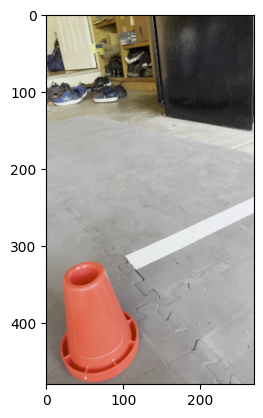

In [7]:
print(len(img_train))
data = np.asarray(img_test[100])
print(data.shape)
imgplot = plt.imshow(data)
plt.show()

In [8]:
img_train  = np.asarray(img_train)
clas_train = np.asarray(clas_train)
img_test   = np.asarray(img_test)
clas_test  = np.asarray(clas_test)

In [9]:
img_train = img_train / 255.0
img_test = img_test / 255.0

In [10]:
print(img_train.dtype)
print(img_test.dtype)

float64
float64


In [11]:
def make_model():
      model = keras.Sequential([
         keras.layers.Flatten(input_shape=(480, 270, 3)),
         keras.layers.Dense(512, activation='relu'),
         keras.layers.Dense(4)
      ])
      model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])
      return model

model=make_model()
#history = model.fit(istrain, isclas, epochs=10)
history = model.fit(img_train,clas_train,epochs = 10 , validation_data = (img_test, clas_test))

2022-10-01 20:08:03.149146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-01 20:08:03.153119: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-01 20:08:41.253943: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/3


2022-10-01 20:08:43.103903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - ETA: 0s - loss: 98.8917 - accuracy: 0.7863 

2022-10-01 20:09:13.961720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 38s 723ms/step - loss: 98.8917 - accuracy: 0.7863 - val_loss: 40.7483 - val_accuracy: 0.6815
Epoch 2/3
46/46 [==============================] - 27s 442ms/step - loss: 0.1676 - accuracy: 0.9973 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
46/46 [==============================] - 20s 425ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


ValueError: x and y must have same first dimension, but have shapes (10,) and (3,)

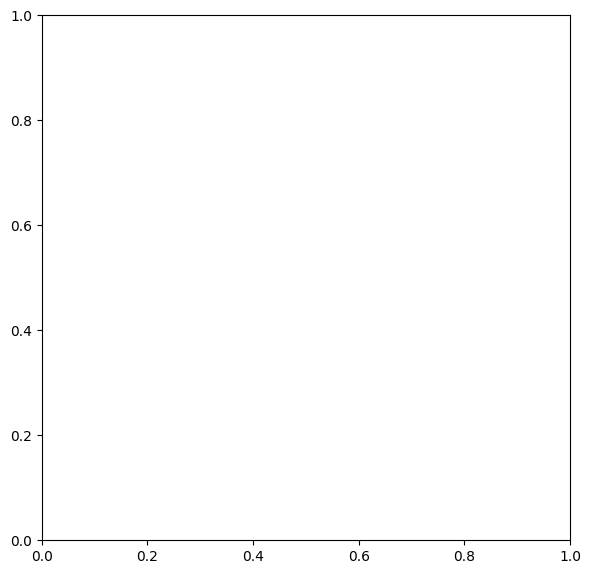

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [12]:
#modelname = '/Users/aadipatangi/Desktop/Python Projects/ConeDetection/model/model1'
h5model = '/Users/aadipatangi/Desktop/Python Projects/ConeDetection/model/tf_model1.h5'
model.save(h5model)



In [49]:
# model.save(modelname)
# print('done')

INFO:tensorflow:Assets written to: /Users/aadipatangi/Desktop/Python Projects/ConeDetection/model/model1/assets
done


In [5]:
# Convert the model.
# converter = tf.lite.TFLiteConverter.from_saved_model("/Users/aadipatangi/Desktop/Python Projects/ConeDetection/model/model1") # path to the SavedModel directory
# tflite_model = converter.convert()

# # Save the model.
# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)
TFLITE_MODEL_NAME = "tf_lite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_saved_model(modelname)
tflite_model = tf_lite_converter.convert()


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-01 20:02:41.499144: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-01 20:02:41.499222: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:


model = tf.keras.models.load_model('model/tf_model1.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("tf_model1.tflite", "wb").write(tflite_model)

2022-10-02 23:30:16.622628: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-02 23:30:16.622958: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

INFO:tensorflow:Assets written to: /var/folders/3n/9kc6b8d14rj_qlx2vvbqfnfh0000gn/T/tmpl9kkfogy/assets
